###### Rasheed Alqobbaj
# Jupyter Notebook Setup and Machine Learning Workflow
### Tutorial for COMP4388 Assignment
This notebook will guide you through:
1. Setting up and using Jupyter Notebook.
2. Working with essential Python libraries: Pandas, Matplotlib, and Scikit-learn.
3. Implementing tasks from the project.

---

## Section 0: Introduction to Jupyter Notebook and Python
Jupyter Notebook is an open-source web application that allows you to create and share documents containing live code, equations, visualizations, and narrative text. It's a powerful tool for data analysis and machine learning.

### Options for Running Jupyter Notebook
1. **Local Installation**: Install Jupyter Notebook on your computer using Anaconda or pip. and program using vscode or pycharm.
2. **Google Colab**: Use Google Colab, a free cloud service with GPU support. It's a great option if you don't want to install anything on your computer.
3. **Kaggle Kernels**: Use Kaggle Kernels, another cloud-based platform for data science and machine learning.

### Notebook Cells
- **Code Cells**: Write and execute Python code.
- **Markdown Cells**: Write text using Markdown syntax.

### Keyboard Shortcuts
- **Run Cell**: Shift + Enter


---


### Python Basics
You can learn Python basics from the following resources:
- [Python Tutorial (w3schools)](https://www.w3schools.com/python/)
- [Python Documentation](https://docs.python.org/3/tutorial/index.html)
- [Python for Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

## Section 1: Install Required Libraries (Can be skipped if using Google Colab or Kaggle)
Use the commands below to install libraries.
`pip install notebook pandas matplotlib scikit-learn seaborn`

## Section 2: Key Libraries and Their Uses
We'll use:
- `pandas` for data analysis and manipulation.
- `matplotlib` and `seaborn` for data visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Section 3: Working with the Dataset
### Load the Dataset
We'll load the dataset and perform basic exploration.

In [2]:
# Load the dataset
data = pd.read_csv('iris.csv')

# Show the first few rows
print("Dataset Overview:")
data.head()

Dataset Overview:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Display dataset shape and information (data types)
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Dataset Information Given:

This dataset contains randomly collected data of customer churn from a telecommunication company.
The data is collected over a period of 12 months. 
A total of number of observation is 3150.

Attribute Information:
1. ID: customer ID 
2. Freq. of use: the total number of calls 
3. Freq. of SMS: the total number of text messages 
4. Charge Amount: ordinal attribute  in which 0 refers to the lowest amount and 9 refers to highest amount
5. **Seconds of Use: total duration of calls in seconds** 
6. Distinct Numbers: total number of distinct phone calls 
7. Call Failures: the total number of call failures 
8. Complains: refers to if the customer have complains about the service or not
9. Age Group: ordinal attribute (1: younger age, 5: older age) 
10. Age: the age of customer
11. Plan: prepaid or postpaid plan 
12. Status: a binary attribute refers to the status of customers (active or not-active) 
13. Churn: the class label (churn or non-churn)
14. Customer Value: a calculated value of customer (continuous attribute)

In [4]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Section 4: Exploratory Data Analysis (EDA)
### 1. Summary Statistics

In [5]:
# Display summary statistics
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### 2. Visualizing Class Distribution
Let's see the Species distribution.

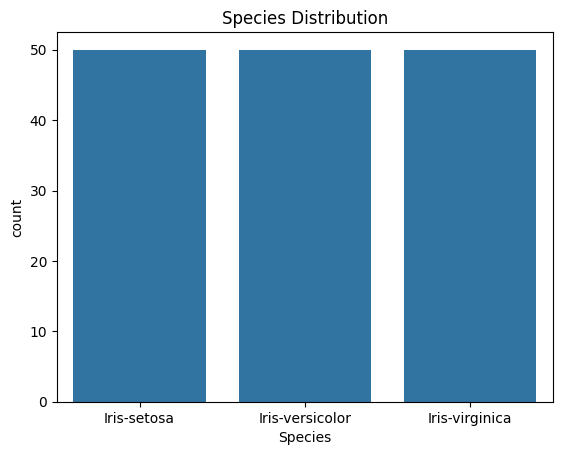

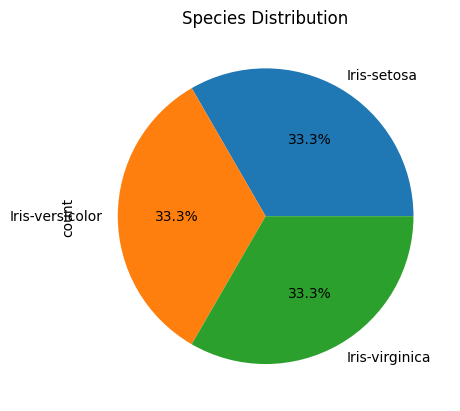

In [8]:
# Churn distribution
sns.countplot(x='Species', data=data)
plt.title('Species Distribution')
plt.show()

# Pie chart
data['Species'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Species Distribution')
plt.show()


### 3. Histograms for Species by Sepal Length and Width

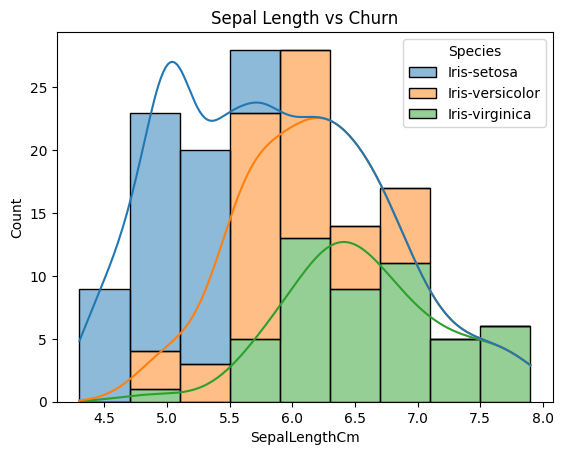

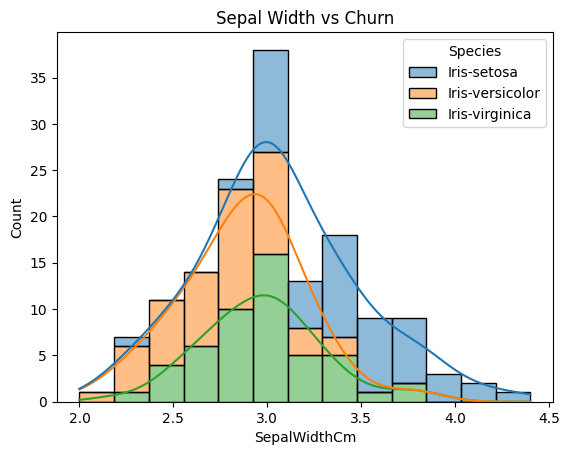

In [ ]:
# Sepal Length histogram
sns.histplot(data=data, x='SepalLengthCm', hue='Species', multiple='stack', kde=True)
plt.title('Sepal Length vs Churn')
plt.show()

# Sepal Width histogram
sns.histplot(data=data, x='SepalWidthCm', hue='Species', multiple='stack', kde=True)
plt.title('Sepal Width vs Churn')
plt.show()

### 4. Boxplot for Sepal Length by Species

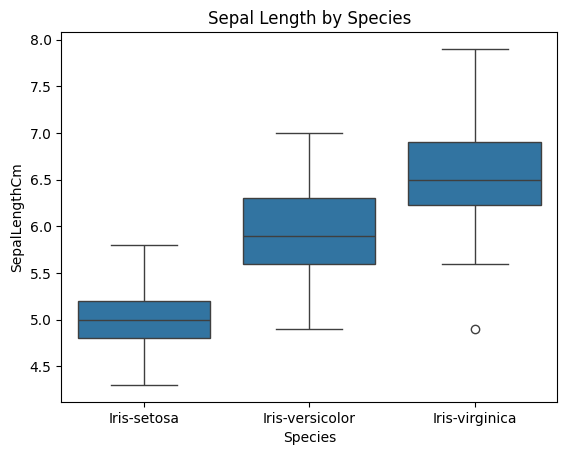

In [11]:
# Boxplot for customer value by churn
sns.boxplot(x='Species', y='SepalLengthCm', data=data)
plt.title('Sepal Length by Species')
plt.show()

## Section 5: Correlation Heatmap
Analyze feature correlations.

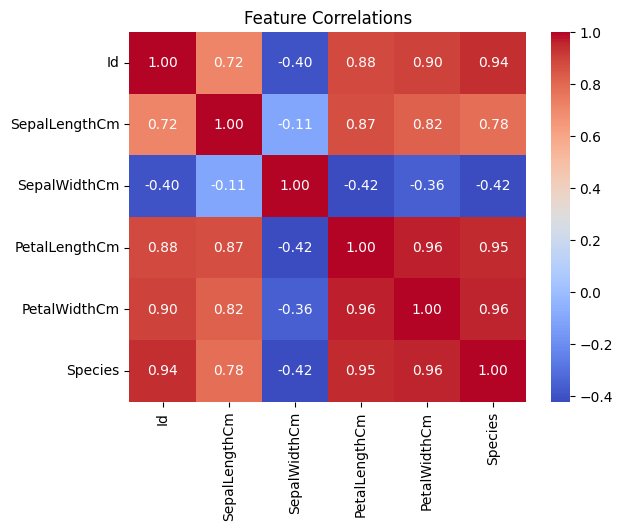

In [15]:
Corr_data = data
# Fix data type of species so it works in the .corr() function using dummy variables
Corr_data['Species'] = Corr_data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# Correlation heatmap
corr_matrix = Corr_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

## Section 6: Splitting Data for Training and Testing
We'll prepare the data for machine learning.

In [17]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (70%) and testing (30%)
X = data.drop(['Species'], axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training Set: {X_train.shape}")
print(f"Testing Set: {X_test.shape}")

Training Set: (105, 5)
Testing Set: (45, 5)


## Section 7: Linear Regression Example
Train a regression model on the data.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
acc = model.score(X_test, y_test)

print(f"Mean Squared Error: {mse}")
print(f"Accuracy: {acc}")

Mean Squared Error: 0.020835810115039554
Accuracy: 0.969948350795616


## Section 8: Next Steps
1. Extend the notebook to include classification models.
2. Use additional visualizations for better insights.
3. Export results and include explanations for your report.

---

Thank you for following this tutorial!
###### Rasheed Alqobbaj